# Test du meilleur modèle de machine learning pour chacune des 3 classifications

## 0 Importation des bibliothèques nécessaires

In [20]:
import pandas as pd
import numpy as np
import os
import cv2
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Installation du Drive

In [3]:
#Pour Google Colab, installation du drive
#Installation du drive
from google.colab import drive
drive.mount('/content/drive')
#Attention, attendre que le Drive soit réellement monté avant de poursuivre

Mounted at /content/drive


## 2 Préparation des images de test
### 2.1 Initialisation des chemins des fichiers

In [4]:
#Nom du répertoire contenant les images de test
pathTest = "/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/"

#Modèles
pathPred = "/content/drive/MyDrive/ProjetPlantes/Donnees/modeles/"
pathModel2 = pathPred + "modelRF_2.pkl"
pathModel14 = pathPred + "modelSVM_14.pkl"
pathModel38 = pathPred + "modelSVM_38.pkl"


### 2.2 Création de df_Test pour stocker les informations des images de test

In [62]:
#Fonction permettant à partir du nom du fichier de l'image de rechercher les informations saine/malade, plante, catégorie d'une feuille du jeu de test
def InfoNomImageTest(nom):
    if ("Apple" in nom) and ("Scab" in nom):
      Categorie = "Apple__Apple_scab"
      Plante = "Apple"
      Saine = "Malade"
    elif ("Apple" in nom) and ("Rot" in nom):
      Categorie = "Apple__Black_rot"
      Plante = "Apple"
      Saine = "Malade"
    elif ("Apple" in nom) and ("Rust" in nom):
      Categorie = "Apple__Cedar_apple_rust"
      Plante = "Apple"
      Saine = "Malade"
    elif ("Apple" in nom) and ("Healthy" in nom):
      Categorie = "Apple__healthy"
      Plante = "Apple"
      Saine = "Saine"
    elif ("Blueberry" in nom) and ("Healthy" in nom):
      Categorie = "Blueberry__healthy"
      Plante = "Blueberry"
      Saine = "Saine"
    elif ("Cherry" in nom) and ("Mildew" in nom):
      Categorie = "Cherry_(including_sour)__Powdery_mildew"
      Plante = "Cherry_(including_sour)"
      Saine = "Malade"
    elif ("Cherry" in nom) and ("Healthy" in nom):
      Categorie = "Cherry_(including_sour)__healthy"
      Plante = "Cherry_(including_sour)"
      Saine = "Saine"
    elif ("Corn" in nom) and ("Leaf" in nom) and ("Spot" in nom):
      Categorie = "Corn_(maize)__Cercospora_leaf_spot Gray_leaf_spot"
      Plante = "Corn_(maize)"
      Saine = "Malade"
    elif ("Corn" in nom) and ("Rust" in nom):
      Categorie = "Corn_(maize)__Common_rust_"
      Plante = "Corn_(maize)"
      Saine = "Malade"
    elif ("Corn" in nom) and ("Leaf" in nom) and ("Blight" in nom):
      Categorie = "Corn_(maize)__Northern_Leaf_Blight"
      Plante = "Corn_(maize)"
      Saine = "Malade"
    elif ("Corn" in nom) and ("Healthy" in nom):
      Categorie = "Corn_(maize)__healthy"
      Plante = "Corn_(maize)"
      Saine = "Saine"
    elif ("Grape" in nom) and ("Rot" in nom):
      Categorie = "Grape__Black_rot"
      Plante = "Grape"
      Saine = "Malade"
    elif ("Grape" in nom) and ("Esca" in nom):
      Categorie = "Grape__Esca_(Black_Measles)"
      Plante = "Grape"
      Saine = "Malade"
    elif ("Grape" in nom) and ("Leaf" in nom) and ("Spot" in nom):
      Categorie = "Grape__Leaf_blight_(Isariopsis_Leaf_Spot)"
      Plante = "Grape"
      Saine = "Malade"
    elif ("Grape" in nom) and ("Healthy" in nom):
      Categorie = "Grape__healthy"
      Plante = "Grape"
      Saine = "Saine"
    elif ("Orange" in nom) and ("Haunglongbing" in nom):
      Categorie = "Orange__Haunglongbing_(Citrus_greening)"
      Plante = "Orange"
      Saine = "Malade"
    elif ("Peach" in nom) and ("Bacterial" in nom):
      Categorie = "Peach__Bacterial_spot"
      Plante = "Peach"
      Saine = "Malade"
    elif ("Peach" in nom) and ("Healthy" in nom):
      Categorie = "Peach__healthy"
      Plante = "Peach"
      Saine = "Saine"
    elif ("Pepper" in nom) and ("Bacterial" in nom):
      Categorie = "Pepper,_bell__Bacterial_spot"
      Plante = "Pepper,_bell"
      Saine = "Malade"
    elif ("Pepper" in nom) and ("Healthy" in nom):
      Categorie = "Pepper,_bell__healthy"
      Plante = "Pepper,_bell"
      Saine = "Saine"
    elif ("Potato" in nom) and ("Early" in nom) and ("Blight" in nom):
      Categorie = "Potato__Early_blight"
      Plante = "Potato"
      Saine = "Malade"
    elif ("Potato" in nom) and ("Late" in nom) and ("Blight" in nom):
      Categorie = "Potato__Late_blight"
      Plante = "Potato"
      Saine = "Malade"
    elif ("Potato" in nom) and ("Healthy" in nom):
      Categorie = "Potato__healthy"
      Plante = "Potato"
      Saine = "Saine"
    elif ("Raspberry" in nom) and ("Healthy" in nom):
      Categorie = "Raspberry__healthy"
      Plante = "Raspberry"
      Saine = "Saine"
    elif ("Soybean" in nom) and ("Healthy" in nom):
      Categorie = "Soybean__healthy"
      Plante = "Soybean"
      Saine = "Saine"
    elif ("Squash" in nom) and ("Mildew" in nom):
      Categorie = "Squash__Powdery_mildew"
      Plante = "Squash"
      Saine = "Malade"
    elif ("Strawberry" in nom) and ("Scorch" in nom):
      Categorie = "Strawberry__Leaf_scorch"
      Plante = "Strawberry"
      Saine = "Malade"
    elif ("Strawberry" in nom) and ("Healthy" in nom):
      Categorie = "Strawberry__healthy"
      Plante = "Strawberry"
      Saine = "Saine"
    elif ("Tomato" in nom) and ("Bacterial" in nom):
      Categorie = "Tomato__Bacterial_spot"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Early" in nom) and ("Blight" in nom):
      Categorie = "Tomato__Early_blight"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Late" in nom) and ("Blight" in nom):
      Categorie = "Tomato__Late_blight"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Mold" in nom):
      Categorie = "Tomato__Leaf_Mold"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Leaf" in nom) and ("Spot" in nom):
      Categorie = "Tomato__Septoria_leaf_spot"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Spider" in nom):
      Categorie = "Tomato__Spider_mites Two-spotted_spider_mite"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Target" in nom) and ("Spot" in nom):
      Categorie = "Tomato__Target_Spot"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Curl" in nom) and ("Virus" in nom):
      Categorie = "Tomato__Tomato_Yellow_Leaf_Curl_Virus"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Mosaic" in nom):
      Categorie = "Tomato__Tomato_mosaic_virus"
      Plante = "Tomato"
      Saine = "Malade"
    elif ("Tomato" in nom) and ("Healthy" in nom):
      Categorie = "Tomato__healthy"
      Plante = "Tomato"
      Saine = "Saine"
    else:
      Categorie = "Unknown"
      Plante = "Unknown"
      Saine = "Unknown"
    return Saine, Plante, Categorie


In [ ]:
#Init de la liste qui contiendra les images de test
new_rows = []
#Parcours des images du répertoire de test
for image in os.listdir(pathTest):
    #Recherche des infos des images à partir du nom
    Saine, Plante, Categorie  = InfoNomImageTest(image)
    #Création du nom complet de l'image
    nomPath = pathTest + image
    #Création de la nouvelle liste
    new_row = {'nomPath' : nomPath, 'Saine' : Saine, 'Plante' : Plante, 'Categorie' : Categorie}
    new_rows.append(new_row)

#Création du DataFrame de test
df_Test = pd.DataFrame(new_rows)
df_Test.head()

## 3 Prédictions
### 3.1 Fonction de calcul de l'histogramme d'intensité d'une image

In [6]:
#Fonction du calcul de l'histogramme
def CalculHistImage(nomPath):
    #lecture de l'image
    img = cv2.imread(nomPath)
    print (nomPath)
    # Calcul des histogrammes pour les 3 couleurs
    histB = cv2.calcHist([img], [0], None, [256], [0, 256])
    histG = cv2.calcHist([img], [1], None, [256], [0, 256])
    histR = cv2.calcHist([img], [2], None, [256], [0, 256])
    # Suppression des valeurs de début et de fin
    histB = histB[10:-10]
    histG = histG[10:-10]
    histR = histR[10:-10]
    # Concaténation des histogrammes et conversion en DataFrame
    df_tabHistInt = pd.DataFrame(np.concatenate([histB, histG, histR], axis=None))
    #on retourne le DataFrame transposé (1 ligne et 708 colonnes)
    return df_tabHistInt.T

### 3.2 Fonction de recherche des 3 prédictions pour une image

In [14]:
#Chargement des modèles
Model2 = joblib.load(pathModel2)
Model14 = joblib.load(pathModel14)
Model38 = joblib.load(pathModel38)

def Prediction(nomPath):
  #Fonction permettant de renvoyer les prédictions des différents modèles en fonction du path d'une image donné en paramètre
  #Calcul de l'histogramme de l'image
  data = CalculHistImage(nomPath)

  #Prédiction du modèle feuille saine/malade et conversion de la valeur de retour (0=malade ; 1=saine)
  if ((Model2.predict(data))[0] == 0):
    pred_saine = 'Malade'
  elif ((Model2.predict(data))[0] == 1):
    pred_saine = 'Saine'
  else:
    pred_saine = 'Unknown'

  #Prédiction du modèle type de plante
  pred_plante = Model14.predict(data)

  #Prédiction du type de catégorie (couple plante/maladie)
  pred_categorie = Model38.predict(data)

  return pred_saine, pred_plante, pred_categorie

## 4 Affichage
### 4.1 Affichage des prédictions pour une image prise au hasard

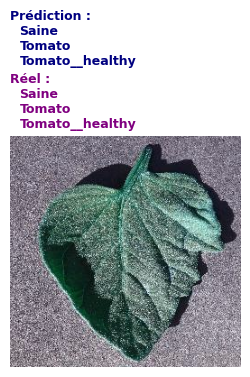

In [64]:
#Affichage des prédictions et valeurs réelles pour une image prise au hasard
plt.figure(figsize=(3,3))
# On choisit une image en aléatoire sur les images de Test (chargées dans df_Test)
indice = np.random.randint(df_Test.shape[0])
pathImg = df_Test.loc[indice].nomPath
#Recherche des prédictions
#pred_saine, pred_plante, pred_categorie = Prediction(pathImg)
#Affichage de l'image
img = cv2.imread(df_Test.loc[indice].nomPath)
plt.imshow(img)
plt.axis('off')
plt.text(0, -130, 'Prédiction : ', color='navy', fontsize=9, fontweight='bold')
plt.text(10, -80, '{}\n{}\n{}'.format(pred_saine, pred_plante[0], pred_categorie[0]), color='navy', fontsize=9, fontweight='bold')
plt.text(0, -60, 'Réel : ', color='purple', fontsize=9, fontweight='bold')
plt.text(10, -10, '{}\n{}\n{}'.format(df_Test.loc[indice].Saine, df_Test.loc[indice].Plante, df_Test.loc[indice].Categorie),
    color='purple', fontsize=9, fontweight='bold')
plt.show();

## 4.2 Affichage des prédictions pour 9 images prises au hasard

/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/PotatoEarlyBlight5.JPG
/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/AppleCedarRust3.JPG
/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/CornCommonRust2.JPG


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted wi

/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/PotatoHealthy2.JPG
/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/TomatoEarlyBlight4.JPG
/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/AppleCedarRust4.JPG


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, bu

/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/CornCommonRust2.JPG
/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/CornCommonRust2.JPG
/content/drive/MyDrive/ProjetPlantes/Donnees/NPD/test/TomatoYellowCurlVirus4.JPG


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


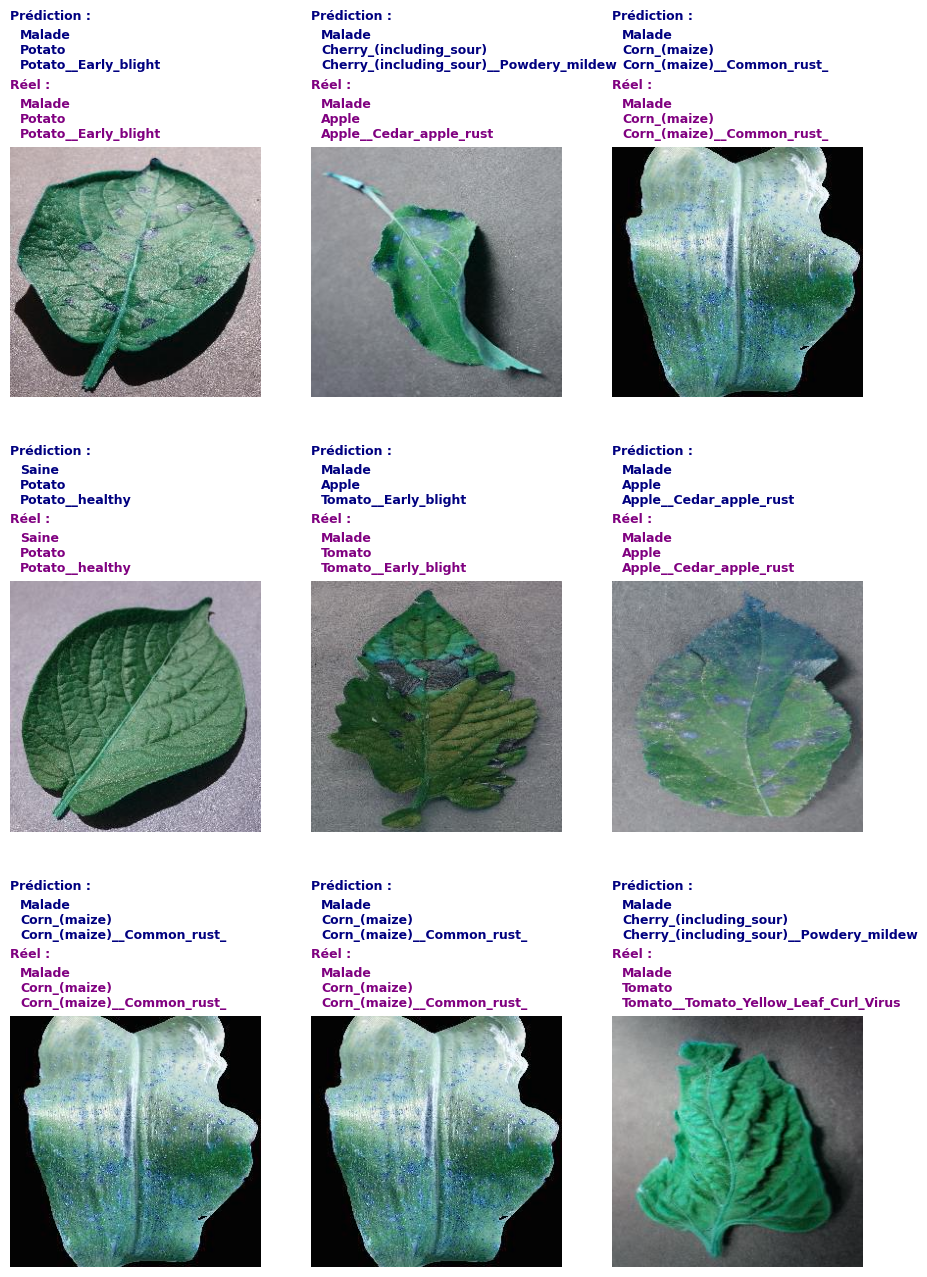

In [51]:
#Affichage des prédictions et valeurs réelles pour 9 images de test prises au hasard
fig, axs = plt.subplots(3, 3, figsize=(11, 16))

for row in range(3):
    for col in range(3):
        # On choisit une image en aléatoire sur les images de Test (chargées dans df_Test)
        indice = np.random.randint(df_Test.shape[0])
        pathImg = df_Test.loc[indice].nomPath
        #Recherche des prédictions
        pred_saine, pred_plante, pred_categorie = Prediction(pathImg)
        #Affichage de l'image
        img = cv2.imread(df_Test.loc[indice].nomPath)
        axs[row, col].imshow(img)
        axs[row, col].axis('off')
        axs[row, col].text(0, -130, 'Prédiction : ',
            color='navy', fontsize=9, fontweight='bold')
        axs[row, col].text(10, -80, '{}\n{}\n{}'.format(pred_saine, pred_plante[0], pred_categorie[0]),
            color='navy', fontsize=9, fontweight='bold')
        axs[row, col].text(0, -60, 'Réel : ',
            color='purple', fontsize=9, fontweight='bold')
        axs[row, col].text(10, -10, '{}\n{}\n{}'.format(df_Test.loc[indice].Saine, df_Test.loc[indice].Plante, df_Test.loc[indice].Categorie),
            color='purple', fontsize=9, fontweight='bold')
plt.show();